# Assignment 4

In this assignment, you'll combine the assignment 3 data set with nutrition data from the [USDA Food Composition Databases](https://ndb.nal.usda.gov/ndb/search/list). The CSV file `fresh.csv` contains the fresh fruits and vegetables data you extracted in assignment 3.

The USDA Food Composition Databases have a [documented](https://ndb.nal.usda.gov/ndb/doc/index) web API that returns data in JSON format . You need a key in order to use the API. Only 1000 requests are allowed per hour, so it would be a good idea to use [caching][requests_cache].

[Sign up for an API key here](https://api.data.gov/signup/). The key will work with any Data.gov API. You may need the key again later in the quarter, so make sure you save it.

These modules may be useful:

* [requests](http://docs.python-requests.org/en/master/user/quickstart/)
* [requests_cache][]
* [urlparse](https://docs.python.org/2/library/urlparse.html)
* [pandas](http://pandas.pydata.org/pandas-docs/stable/)

[requests_cache]: https://pypi.python.org/pypi/requests-cache

__Exercise 1.1.__ Read the [search request documentation](https://ndb.nal.usda.gov/ndb/doc/apilist/API-SEARCH.md), then write a function called `ndb_search()` that makes a search request. The function should accept the search term as an argument. The function should return the search result items as a list (for 0 items, return an empty list).

Note that the search url is: `https://api.nal.usda.gov/ndb/search`

As an example, a search for `"quail eggs"` should return this list:

```python
[{u'ds': u'BL',
  u'group': u'Branded Food Products Database',
  u'name': u'CHAOKOH, QUAIL EGG IN BRINE, UPC: 044738074186',
  u'ndbno': u'45094707',
  u'offset': 0},
 {u'ds': u'BL',
  u'group': u'Branded Food Products Database',
  u'name': u'L&W, QUAIL EGGS, UPC: 024072000256',
  u'ndbno': u'45094890',
  u'offset': 1},
 {u'ds': u'BL',
  u'group': u'Branded Food Products Database',
  u'name': u'BUDDHA, QUAIL EGGS IN BRINE, UPC: 761934535098',
  u'ndbno': u'45099560',
  u'offset': 2},
 {u'ds': u'BL',
  u'group': u'Branded Food Products Database',
  u'name': u'GRAN SABANA, QUAIL EGGS, UPC: 819140010103',
  u'ndbno': u'45169279',
  u'offset': 3},
 {u'ds': u'BL',
  u'group': u'Branded Food Products Database',
  u'name': u"D'ARTAGNAN, QUAIL EGGS, UPC: 736622102630",
  u'ndbno': u'45178254',
  u'offset': 4},
 {u'ds': u'SR',
  u'group': u'Dairy and Egg Products',
  u'name': u'Egg, quail, whole, fresh, raw',
  u'ndbno': u'01140',
  u'offset': 5}]
```

As usual, make sure you document and test your function.

In [6]:
from urllib2 import Request, urlopen
import requests, requests_cache
requests_cache.install_cache("cache")
import pandas as pd
import json
from matplotlib import pyplot as plt
plt.style.use('ggplot')
%matplotlib inline
from __future__ import division
from numpy import arange
key = '0UR4Gr8ak8F9fi9TteVFhqRZTHFtdddWt3zYaOEN'

def ndb_search(term, verbose = False):
    """Input: food name
    Output: search result from usda.gov"""
    url = "https://api.nal.usda.gov/ndb/search"
    response = requests.get(url, params = {
            "q": term,
            "format": 'json',
            "api_key": key
        })
    response.raise_for_status() # check for errors
    if verbose:
        print response.url
    return dict.items(response.json()) # parse JSON
ndb_search('quail eggs')

[(u'list',
  {u'ds': u'any',
   u'end': 6,
   u'group': u'',
   u'item': [{u'ds': u'BL',
     u'group': u'Branded Food Products Database',
     u'name': u'CHAOKOH, QUAIL EGG IN BRINE, UPC: 044738074186',
     u'ndbno': u'45094707',
     u'offset': 0},
    {u'ds': u'BL',
     u'group': u'Branded Food Products Database',
     u'name': u'L&W, QUAIL EGGS, UPC: 024072000256',
     u'ndbno': u'45094890',
     u'offset': 1},
    {u'ds': u'BL',
     u'group': u'Branded Food Products Database',
     u'name': u'BUDDHA, QUAIL EGGS IN BRINE, UPC: 761934535098',
     u'ndbno': u'45099560',
     u'offset': 2},
    {u'ds': u'BL',
     u'group': u'Branded Food Products Database',
     u'name': u'GRAN SABANA, QUAIL EGGS, UPC: 819140010103',
     u'ndbno': u'45169279',
     u'offset': 3},
    {u'ds': u'BL',
     u'group': u'Branded Food Products Database',
     u'name': u"D'ARTAGNAN, QUAIL EGGS, UPC: 736622102630",
     u'ndbno': u'45178254',
     u'offset': 4},
    {u'ds': u'SR',
     u'group': u'Dairy

__Exercise 1.2.__ Use your search function to get NDB numbers for the foods in the `fresh.csv` file. It's okay if you don't get an NDB number for every food, but try to come up with a strategy that gets most of them. Discuss your strategy in a short paragraph.

Hints:

* The foods are all raw and unbranded.
* You can test search terms with the [online search page](https://ndb.nal.usda.gov/ndb/search/list).
* You can convert the output of `ndb_search()` to a data frame with `pd.DataFrame()`.
* The string methods for [Python](https://docs.python.org/2/library/stdtypes.html#string-methods) and [Pandas](http://pandas.pydata.org/pandas-docs/stable/text.html#method-summary) are useful here. It's okay if you use _simple_ regular expressions in the Pandas methods, although this exercise can be solved without them.
* You can merge data frames that have a column in common with `pd.merge()`.

<strong>Strategies for the missing NDB numbers:</strong><p>
The problem that some foods are unable to get their NDB numbers is because  the food names from the 'food' column does not match the usda search terms. My strategies for solving this situation is to change the food names by:</p>
1. adding some keywords
2. removing symbols 
3. changing the structure to singular form

<p>For example, I created 2 dictionaries, 'add' and 'rid', each dictionaries has its own loop to either add more keywords or get rid of some words/ symbols from the term. By using the strategies above, I found all the correct results for the NDB numbers.</p>

In [7]:
def get_ndbno(term, verbose = False):
    """Input: food name
    Output: NDB number for the food you input
    """
    url = "https://api.nal.usda.gov/ndb/search"
    add = {'kiwi':'fruit','red_peppers':' sweet','green_peppers':' sweet','acorn_squash': ' winter','green_beans':' snap','summer_squash':' all varieties','butternut_squash':' winter'}
    rid = {'collard_greens':'collards'}
    if term in add:
        term = "".join([term, add[term]])
    if term in rid:
        term = rid[term]
    terms = "".join([term, ' raw'])
    
    response = requests.get(url, params = {
            "q": terms,
            "format": 'json',
            "sort": "r",
            "max": "1",
            "group": ['Fruits and Fruit Juices','Vegetables and Vegetable Products'],
            "api_key": key
        })
    response.raise_for_status() # check for errors
    if verbose:
        print response.url
    d = response.json()
    
    if 'errors' in d:
        return ''
    if 'Branded' in str(d['list']['item'][0]):
        return ''
    else:
        item = d['list']['item']
        return str(pd.DataFrame(item)['ndbno'][0])
get_ndbno('plums')

'09279'

In [8]:
# create a new column named 'NDB_number' and sort the ndb number into that column
f = pd.read_csv("/Users/KathrynChiang/Downloads/STA141B/HW4 & lab4/fresh.csv")
ndb = []
for i in f['food']:
    ndb.append(get_ndbno(i))
NDB_col = pd.DataFrame(ndb, columns=['NDB_number'])
fresh_NDB = pd.concat([f,NDB_col], axis=1)
fresh_NDB.head()

,form,price_per_lb,yield,lb_per_cup,price_per_cup,food,type,NDB_number
0,Fresh1,0.333412,0.52,0.330693,0.212033,watermelon,fruit,09326
1,Fresh1,0.535874,0.51,0.374786,0.393800,cantaloupe,fruit,09181
2,Fresh1,1.377962,0.74,0.407855,0.759471,tangerines,fruit,09221
3,Fresh1,2.358808,0.94,0.319670,0.802171,strawberries,fruit,09316
4,Fresh1,1.827416,0.94,0.363763,0.707176,plums,fruit,09279


__Exercise 1.3.__ Read the [food reports V2 documentation](https://ndb.nal.usda.gov/ndb/doc/apilist/API-FOOD-REPORTV2.md), then write a function called `ndb_report()` that requests a _basic_ food report. The function should accept the NDB number as an argument and return the list of nutrients for the food.

Note that the report url is: `https://api.nal.usda.gov/ndb/V2/reports`

For example, for `"09279"` (raw plums) the first element of the returned list should be:

```python
{u'group': u'Proximates',
 u'measures': [{u'eqv': 165.0,
   u'eunit': u'g',
   u'label': u'cup, sliced',
   u'qty': 1.0,
   u'value': u'143.93'},
  {u'eqv': 66.0,
   u'eunit': u'g',
   u'label': u'fruit (2-1/8" dia)',
   u'qty': 1.0,
   u'value': u'57.57'},
  {u'eqv': 151.0,
   u'eunit': u'g',
   u'label': u'NLEA serving',
   u'qty': 1.0,
   u'value': u'131.72'}],
 u'name': u'Water',
 u'nutrient_id': u'255',
 u'unit': u'g',
 u'value': u'87.23'}
```

Be sure to document and test your function.

In [9]:
def ndb_report(ndb_num, verbose = False):
    """Input: NDB number
    Output: basic food report"""
    url = "https://api.nal.usda.gov/ndb/V2/reports"
    
    response = requests.get(url, params = {
            "ndbno": ndb_num,
            "format": "json",
            "type": "b",
            "api_key": key,
        })
    response.raise_for_status() # check for errors
    if verbose:
        print response.url
    if ndb_num == '':
        return 'no report'
    return response.json() # parse JSON
#ndb_report('09279')

__Exercise 1.4.__ Which foods provide the best combination of price, yield, and nutrition? You can use kilocalories as a measure of "nutrition" here, but more a detailed analysis is better. Use plots to support your analysis.

In [30]:
def get_nutrition(food):
    """Input: food name
    Output: nutrition energy value in kcal"""
    if ndb_report(get_ndbno(food)) == 'no report':
        return 'none'
    else:
        nut = ndb_report(get_ndbno(food))['foods'][0]['food']['nutrients'][1]['value']
        return nut

nut = []
for i in f['food']:
    nut.append(get_nutrition(i))
nut_col = pd.DataFrame(nut, columns=['nutrition_value'])
fresh_nut = pd.concat([f, nut_col], axis=1)
col = ['food','price_per_lb','yield','nutrition_value']
comb = pd.DataFrame(fresh_nut, columns = col)
comb.head()

,food,price_per_lb,yield,nutrition_value
0,watermelon,0.333412,0.52,30
1,cantaloupe,0.535874,0.51,34
2,tangerines,1.377962,0.74,43
3,strawberries,2.358808,0.94,32
4,plums,1.827416,0.94,46


In [38]:
best = []
for i in range(len(nut)):
    best.append(float(nut[i])*5*float(comb['yield'][i])/comb['price_per_lb'][i])
print comb.iloc[best.index(max(best))]
print "combination value:",best[14]

food                bananas
price_per_lb       0.566983
yield                  0.64
nutrition_value          89
Name: 14, dtype: object
combination value: 502.30746209


<p>I think the best combination of price, yield, and nutrition is the food that has the lowest price, highest yield, and highest nutrition value. The lowest price per pound means that you get the same amount of food, but you paid less for it. The highest yield means that you get the best output out of 1 unit which is 100 grams. The highest nutrition value means that you get the most energy from the food. We get the maximum of the equation: 5 * (nutrition_value)*(yield) / (price_per_lb) to find the best combination. In the equation, I did nutrition_value * 5 because 500g is approximatly equals to 1 pound. From the plot below, we can see that the optimal maximum is over 500 kcal/$ which has the index of 14, bananas. <strong>Bananas</strong> provide the best combination of the price, yield, and nutrition.
</p>

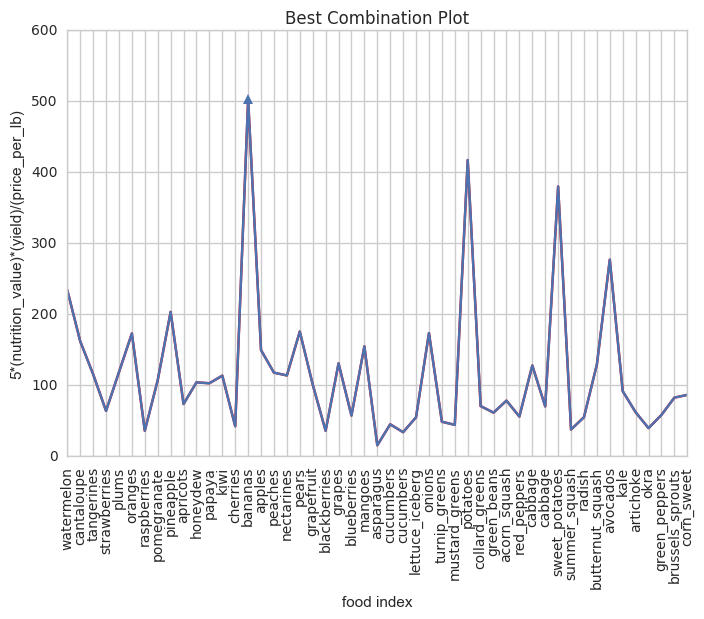

In [40]:
plt.plot(best, color='red') 
plt.title("Best Combination Plot")
plt.ylabel("5*(nutrition_value)*(yield)/(price_per_lb)")
plt.xlabel("food index");
plt.xticks(x, comb['food'],rotation=90)
plt.plot(best, marker='^',markevery=(14,51))
plt.show()